# Boston AirBnB Data Analysis
This project will follow CRISP-DM data science process. It has 6 major phases:

1. Business understanding
2. Data understanding 
3. Data preparing
4. Data Modeling
5. Result answer question bussines
6. Deployment (excluded in this project)

#### 1. Business understanding
Airbnb, which stands for Air Bed and Breakfast, is a community marketplace for booking and renting rooms and apartments, based in Silicon Valley, California founded in 2008, similar to an online ordering system. According to Wikipedia, more than 10 million overnight stays were booked through Airbnb from 2008 to 2012. There are over 14 million listings for rentals in more than 190 countries (as of August 2017).

In this project, we are going to answer three business questions:

* Question 1: What amenities do Boston rooms have?
* Question 2: When is a good time to book a room in Boston?
* Question 3: What relates to the price of rooms in Boston?

#### 2. Data understanding
This dataset describes the listing activity of homestays in Boston, MA in 2008. It contains three files:
* Listings.csv, including full descriptions and average review score
* Reviews.csv, including unique identifiers for each reviewer and detailed comments
* Calendar.csv, including listing id and the price and availability for that day

In this project, we need **Listing** & **Calendar** data to answer the three above business questions. Now, we will explore the number of rows, columns, datatype, missing data of each dataframe.

In [104]:
#import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import r2_score, mean_squared_error

import warnings 
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None

In [105]:
# import data
listings_boston = pd.read_csv('../dataset/listings.csv')
calendar_boston = pd.read_csv('../dataset/calendar.csv')

#### 2.1 Listing Understanding

In [106]:
#check number of rows & columns
print('Listing has ' + str(listings_boston.shape[0]) + ' rows, ' + str(listings_boston.shape[1]) + ' columns.')

Listing has 3585 rows, 95 columns.


In [107]:
listings_boston.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [108]:
# showw data type & count of each columns
listings_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

<BarContainer object of 44 artists>

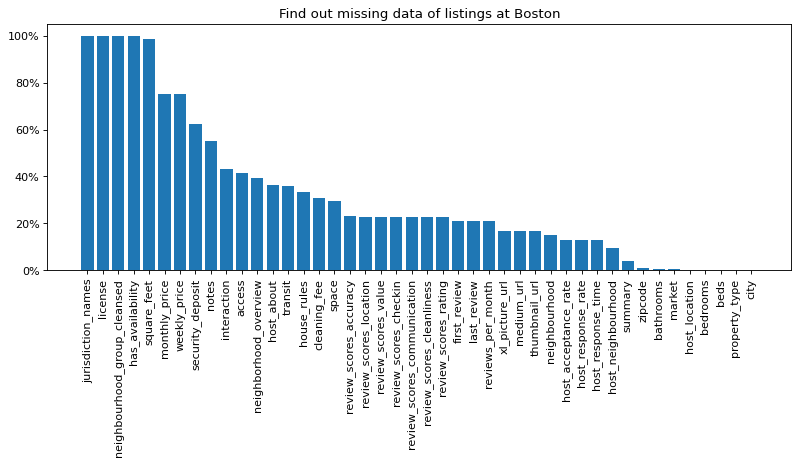

In [109]:
#find out missing data
missing_cols = listings_boston.columns[listings_boston.isnull().sum() > 0]
missing_df = (listings[missing_cols].isnull().sum()/ listings.shape[0] * 100).sort_values(ascending=False)

# visualize missing data
fig, ax = plt.subplots(figsize = (12, 4), dpi = 80)
ax.set(title='Find out missing data of listings at Boston')
ax.tick_params(axis='x', labelrotation = 90)
ax.yaxis.set_major_formatter(mticker.PercentFormatter())
ax.bar(missing_df.index, missing_df)

#### 2.2 Calendar Understanding

In [110]:
#check number of rows & columns
print('Calendars has ' + str(calendar_boston.shape[0]) + ' rows, ' + str(calendar.shape[1]) + ' columns.')

Calendars has 1308890 rows, 4 columns.


In [111]:
calendar_boston.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [112]:
# check data type & count of each columns
calendar_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [113]:
#find out missing data
calendar_boston.isnull().sum()

listing_id         0
date               0
available          0
price         665853
dtype: int64

In [114]:
print('The first date is %s and the last date is %s.' %(calendar_boston['date'].min(), calendar_boston['date'].max()))

The first date is 2016-09-06 and the last date is 2017-09-05.


## 3. Data preparing

Before modeling data, we need to prepare data. This stage includes some actions:

- Removing unnecessary columns
- Extracting, splitting data
- Formatting data
- Dealing with missing data

### 3.1 Listing data prepare

In [199]:
chose_columns = [
        'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 
        'host_since', 'host_response_time', 'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
        'host_is_superhost', 'host_listings_count',
        'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
        'price', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'number_of_reviews',
        'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 
        'cancellation_policy', 'require_guest_profile_picture', 'require_guest_phone_verification', 'calculated_host_listings_count'
    ]
cleaned_listing = listings_boston[chose_columns]
cleaned_listing.head()

,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,host_since,host_response_time,host_has_profile_pic,host_identity_verified,host_response_rate,host_is_superhost,...,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count
0,NaN,NaN,NaN,f,2015-04-15,NaN,t,f,NaN,f,...,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",moderate,f,f,1
1,10.0,9.0,9.0,t,2012-06-07,within an hour,t,t,100%,f,...,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",moderate,f,f,1
2,10.0,9.0,10.0,f,2009-05-11,within a few hours,t,t,100%,t,...,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",moderate,t,f,1
3,10.0,10.0,10.0,f,2013-04-21,within a few hours,t,f,100%,f,...,4,1.0,1.0,2.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",moderate,f,f,1
4,10.0,9.0,10.0,f,2014-05-11,within an hour,t,t,100%,t,...,2,1.5,1.0,2.0,Real Bed,"{Internet,""Wireless Internet"",""Air Conditionin...",flexible,f,f,1


##### Explore data object inside a column to mutils column

In [200]:
def explore_values_columns(df, col_name):
    #extract unique values
    unique_values = set()
    
    for unique_list in df[col_name].unique():
        values = unique_list.replace('[', '').replace("]", '').replace("{", '').replace('}', '').replace('"', '').replace("'", '').split(sep=',')
        values = filter(None, [item.strip() for item in values])
        unique_values.update(values)
    
    #split column
    for unique_value in unique_values:
        df[(col_name + '_' + unique_value)] = np.where(df[col_name].str.contains(unique_value), 1, 0)


explore_values_columns(cleaned_listing,'amenities')
cleaned_listing.drop(columns = ['amenities'], inplace=True)

cleaned_listing.head()

,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,host_since,host_response_time,host_has_profile_pic,host_identity_verified,host_response_rate,host_is_superhost,...,amenities_Smoke Detector,amenities_Heating,amenities_Washer,amenities_Free Parking on Street,amenities_translation missing: en.hosting_amenity_50,amenities_Kitchen,amenities_Elevator in Building,amenities_Gym,amenities_Laptop Friendly Workspace,amenities_24-Hour Check-in
0,NaN,NaN,NaN,f,2015-04-15,NaN,t,f,NaN,f,...,1,1,1,0,0,1,0,0,1,0
1,10.0,9.0,9.0,t,2012-06-07,within an hour,t,t,100%,f,...,1,1,1,0,0,1,0,0,0,0
2,10.0,9.0,10.0,f,2009-05-11,within a few hours,t,t,100%,t,...,1,1,1,0,1,1,0,0,0,0
3,10.0,10.0,10.0,f,2013-04-21,within a few hours,t,f,100%,f,...,1,1,1,0,0,1,0,1,1,0
4,10.0,9.0,10.0,f,2014-05-11,within an hour,t,t,100%,t,...,1,1,0,0,0,1,0,0,0,0


###### **Transform data.**

we need to transform format of price, extra_people, host_response_rate columns from currency string to float,
and extract the year from host_since column.

In [201]:
cleaned_listing['host_since']


0       2015-04-15
1       2012-06-07
2       2009-05-11
3       2013-04-21
4       2014-05-11
           ...    
3580    2014-07-31
3581    2015-07-02
3582    2014-01-14
3583    2016-05-27
3584    2015-08-20
Name: host_since, Length: 3585, dtype: object

In [202]:

#change currency string to float data type
cleaned_listing['price'] = cleaned_listing['price'].apply(lambda x : float(str(x).replace("$", "").replace(',', '')))
cleaned_listing['extra_people'] = cleaned_listing['extra_people'].apply(lambda x : float(str(x).replace("$", "").replace(',', '')))
cleaned_listing['host_response_rate'] = cleaned_listing['host_response_rate'].apply(lambda x : float(str(x).replace("%", "")))

#transform date to year
cleaned_listing['host_since_year'] = pd.to_datetime(cleaned_listing['host_since']).dt.year
cleaned_listing.drop(columns=['host_since'], inplace= True)

#transform true-false to 1-0 values
bool_cols = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'instant_bookable'
            , 'require_guest_profile_picture', 'require_guest_phone_verification']
for bool_col in bool_cols:
    cleaned_listing[bool_col] = cleaned_listing[bool_col].map({'t':1, 'f':0})
            
cleaned_listing.head()


,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,host_response_time,host_has_profile_pic,host_identity_verified,host_response_rate,host_is_superhost,host_listings_count,...,amenities_Heating,amenities_Washer,amenities_Free Parking on Street,amenities_translation missing: en.hosting_amenity_50,amenities_Kitchen,amenities_Elevator in Building,amenities_Gym,amenities_Laptop Friendly Workspace,amenities_24-Hour Check-in,host_since_year
0,NaN,NaN,NaN,0,NaN,1,0,NaN,0,1,...,1,1,0,0,1,0,0,1,0,2015
1,10.0,9.0,9.0,1,within an hour,1,1,100.0,0,1,...,1,1,0,0,1,0,0,0,0,2012
2,10.0,9.0,10.0,0,within a few hours,1,1,100.0,1,1,...,1,1,0,1,1,0,0,0,0,2009
3,10.0,10.0,10.0,0,within a few hours,1,0,100.0,0,1,...,1,1,0,0,1,0,1,1,0,2013
4,10.0,9.0,10.0,0,within an hour,1,1,100.0,1,1,...,1,0,0,0,1,0,0,0,0,2014


###### Fill missing value

In [203]:
# filling categorical columns with mode
mode_cols = ['host_response_time', 'host_is_superhost',
       'host_has_profile_pic', 'host_identity_verified', 'property_type',
       'host_since_year','bathrooms', 'bedrooms', 'beds']
fill_mode = lambda col : col.fillna(col.mode()[0])
cleaned_listing[mode_cols] = cleaned_listing[mode_cols].apply(fill_mode)

# filling categorical columns with mean
mean_cols = [ 'host_response_rate','host_listings_count', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness'
             ,'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']
fill_mean = lambda col : col.fillna(col.mean())
cleaned_listing[mean_cols] = cleaned_listing[mean_cols].apply(fill_mean)

# check if any null columns
cleaned_listing.columns[cleaned_listing.isnull().sum() > 0]

Index([], dtype='object')

#### 3.2 Calendar data Preparation

In [204]:
cleaned_calendar = calendar_boston.copy()
cleaned_calendar['year'] = pd.to_datetime(cleaned_calendar['date']).dt.year
cleaned_calendar['month'] = pd.to_datetime(cleaned_calendar['date']).dt.month
cleaned_calendar.head()

,listing_id,date,available,price,year,month
0,12147973,2017-09-05,f,NaN,2017,9
1,12147973,2017-09-04,f,NaN,2017,9
2,12147973,2017-09-03,f,NaN,2017,9
3,12147973,2017-09-02,f,NaN,2017,9
4,12147973,2017-09-01,f,NaN,2017,9


###### Transform price string date type to float data type

In [205]:
cleaned_calendar['price'] = cleaned_calendar['price'].apply(lambda x : float(str(x).replace("$", "").replace(',', '')))

###### change available string to number 1: true, 0: false

In [206]:
cleaned_calendar['available_num'] = cleaned_calendar['available'].map({'t':1, 'f':0 })
cleaned_calendar.drop(columns=['available'], inplace = True)

cleaned_calendar.head()

,listing_id,date,price,year,month,available_num
0,12147973,2017-09-05,NaN,2017,9,0
1,12147973,2017-09-04,NaN,2017,9,0
2,12147973,2017-09-03,NaN,2017,9,0
3,12147973,2017-09-02,NaN,2017,9,0
4,12147973,2017-09-01,NaN,2017,9,0


In [207]:
#clean price value
cleaned_calendar = cleaned_calendar.dropna(subset = ['price'])
cleaned_calendar.shape

(643037, 6)

## 4. Data modeling

In [208]:
def create_X_y(df, response_col):
    '''
    INPUT
    df - pandas dataframe 
    response_col - response column
    
    OUTPUT
    X - A matrix holding all of the features
    y - the corresponding response vector
    '''
    #1 Create X 
    X = df.drop(columns=[response_col]).copy()
    
    #2. Dummy columns for all the categorical variables in X and drop the original columns
    X_categs = X.select_dtypes(include=['object']).columns
    for col in X_categs:
        dum_df = pd.get_dummies(X[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=False)
        X = pd.concat([X.drop(columns=[col]), dum_df], axis=1)
        
    #3. Create y   
    y = df[response_col].copy()

    return X, y



In [209]:
# Create X and y
X, y = create_X_y(cleaned_listing, 'price')  

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale data
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

#Train ElasticNetCV model
lm_model = ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1],tol=0.01, random_state = 42)
lm_model.fit(scaled_X_train, y_train)


ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], random_state=42,
             tol=0.01)

In [210]:
# Predictive model
y_test_preds = lm_model.predict(scaled_X_test)
y_train_preds = lm_model.predict(scaled_X_train)

# Evaluate Model
train_score = r2_score(y_train, y_train_preds)
test_score = r2_score(y_test, y_test_preds)

#Print training and testing score
print("R-squared -- train data set: %.3f,\t test data set: %.3f" %(train_score, test_score))
print('MSE\t  -- train data set: %.3f,\t test data set: %.3f' % (mean_squared_error(y_train, y_train_preds), mean_squared_error(y_test, y_test_preds)))

R-squared -- train data set: 0.411,	 test data set: 0.264
MSE	  -- train data set: 11275.938,	 test data set: 21066.535


### 5. Result answer question bussines

#### Question 1: What amenities do Boston rooms have?

In [211]:
print(cleaned_listing.get('amenities'))

None


In [212]:
def visualize_listing_barchart(x, y, title, xticklabels=None, ylabel=None, yticker = False):
    fig, ax = plt.subplots(figsize = (8,4) , dpi = 80)
    ax.set(title=title)
    ax.tick_params(axis='x', labelrotation = 90)
    if xticklabels:    
        ax.set_xticklabels(xticklabels)
    if ylabel:
        ax.set_ylabel(ylabel)
    if yticker:
        ax.yaxis.set_major_formatter(yticker)
        
    ax.bar(x, y)

In [213]:
amenities = [
    'amenities_Buzzer/Wireless Intercom', 'amenities_Heating', 'amenities_Wireless Internet', 'amenities_Hangers',
    'amenities_Cat(s)', 'amenities_Suitable for Events', 'amenities_Indoor Fireplace', 
    'amenities_Essentials', 'amenities_Washer','amenities_24-Hour Check-in', 'amenities_Carbon Monoxide Detector',
    'amenities_Laptop Friendly Workspace', 'amenities_Doorman', 'amenities_Family/Kid Friendly', 'amenities_TV', 
    'amenities_Washer / Dryer', 'amenities_Pool','amenities_Pets live on this property', 'amenities_Pets Allowed',
    'amenities_Smoke Detector', 'amenities_Air Conditioning', 'amenities_Smoking Allowed', 'amenities_Gym', 
    'amenities_Safety Card', 'amenities_Lock on Bedroom Door', 'amenities_Free Parking on Premises',  
    'amenities_Cable TV', 'amenities_Hair Dryer','amenities_Wheelchair Accessible', 'amenities_Elevator in Building',   
    'amenities_First Aid Kit', 'amenities_Other pet(s)', 'amenities_Internet', 'amenities_Fire Extinguisher', 
    'amenities_Kitchen','amenities_Hot Tub', 'amenities_Iron','amenities_Breakfast', 'amenities_Dryer', 
    'amenities_Dog(s)', 'amenities_Shampoo'
]

# number of rooms have each amenities
amenities_count = cleaned_listing[amenities].sum().sort_values(ascending=False)
amenities_count

amenities_Internet                      3459
amenities_Wireless Internet             3421
amenities_Heating                       3384
amenities_Kitchen                       3284
amenities_Essentials                    2994
amenities_Dryer                         2993
amenities_Smoke Detector                2911
amenities_Air Conditioning              2821
amenities_TV                            2725
amenities_Washer                        2475
amenities_Carbon Monoxide Detector      2442
amenities_Shampoo                       2421
amenities_Hangers                       1985
amenities_Family/Kid Friendly           1888
amenities_Laptop Friendly Workspace     1834
amenities_Iron                          1828
amenities_Hair Dryer                    1811
amenities_Cable TV                      1770
amenities_Fire Extinguisher             1582
amenities_24-Hour Check-in              1247
amenities_First Aid Kit                 1063
amenities_Elevator in Building           868
amenities_

In [214]:
amenities_rate = amenities_count * 100/cleaned_listing.shape[0]

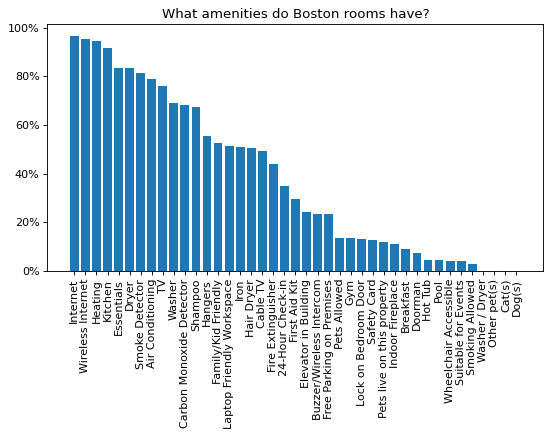

In [215]:
###### visualize amenities rate
visualize_listing_barchart(amenities_rate.index, amenities_rate, 
                           'What amenities do Boston rooms have?', 
                           xticklabels = [item.split('_')[1] for item in amenities_rate.index], 
                           yticker = mticker.PercentFormatter())

###### Answer
From result above, we can see that above 80% have Internet, Heating, Kitchen, Essentials and Dryer. Other hand only few room(less than 14%) have Hot Tub, Pool, Gym, Safety Card.

#### Question 2: What is a good season to book a room in Boston?


In [216]:
month_label = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep']

def visualize_calendar_linechart(x, y, title, y_label=None, yticker = False):
    print(month_label)
    fig, ax = plt.subplots(figsize = (10, 5), dpi = 80)
    ax.set(title=title)
    ax.set_xticks(x)
    ax.set_xticklabels(month_label)
    if y_label :
        ax.set_ylabel(y_label)
    if yticker:
        ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('${x:,.0f}'))
    ax.plot(x, y, linestyle='-')

['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep']


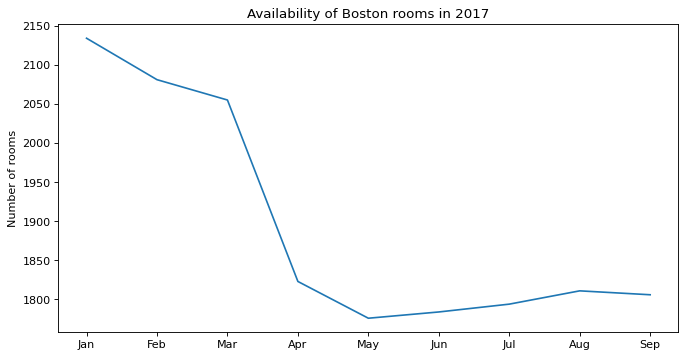

In [217]:
available_by_month_df = cleaned_calendar[cleaned_calendar['year'] == float(2017)].groupby(['month'])['listing_id'].nunique()
available_by_month_df.head()

visualize_calendar_linechart(x=available_by_month_df.index, y=available_by_month_df, title = 'Availability of Boston rooms in 2017', y_label = 'Number of rooms')

['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep']


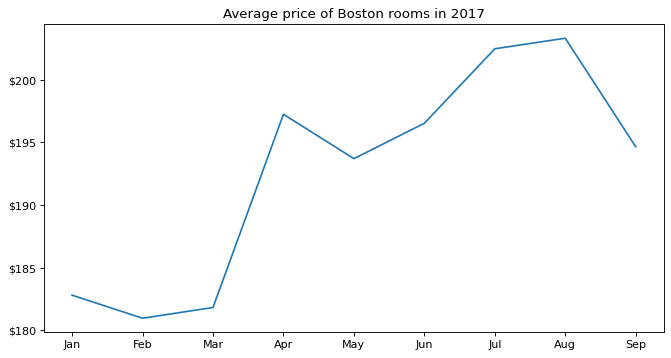

In [218]:
price_df = cleaned_calendar[cleaned_calendar['year'] == float(2017)].groupby(['month'])['price'].mean()
visualize_calendar_linechart(x=price_df.index, y= price_df, 
                      title='Average price of Boston rooms in 2017', yticker = True)

###### Answer
From two graphs above, we can see on the Winter(Jan to Mar), when you should book a room.

#### Question 3: What relates to the price of rooms in Boston?

In [219]:
def coef_weights(coefficients, features):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    features - the features of model
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    '''
    coefs_df = pd.DataFrame()
    coefs_df['features'] = features
    coefs_df['coefs'] = coefficients
    coefs_df['abs_coefs'] = np.abs(coefficients.astype(float))
    
    return coefs_df

coef_df = coef_weights(lm_model.coef_, X_train.columns)
top25_features = coef_df.sort_values(by='abs_coefs', axis=0, ascending=False).head(25)
top25_features

,features,coefs,abs_coefs
86,room_type_Private room,-30.631244,30.631244
20,bedrooms,23.479979,23.479979
94,cancellation_policy_super_strict_30,19.186246,19.186246
19,bathrooms,15.325748,15.325748
18,accommodates,14.544319,14.544319
55,amenities_Doorman,13.559561,13.559561
58,amenities_Free Parking on Premises,-11.613736,11.613736
8,host_listings_count,-10.632203,10.632203
87,room_type_Shared room,-9.986613,9.986613
66,amenities_Elevator in Building,9.378772,9.378772


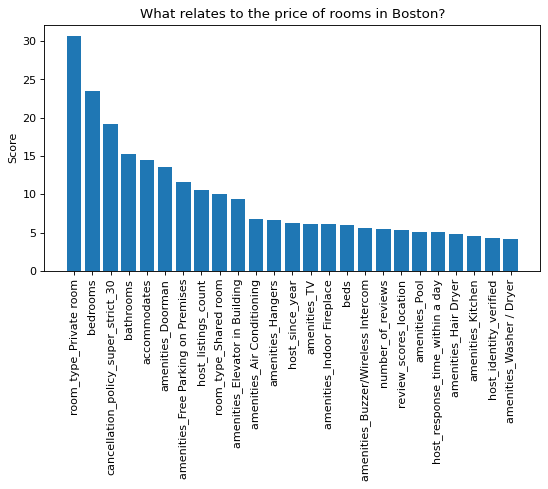

In [220]:
# visualize top 25 features
visualize_listing_barchart(top25_features['features'], top25_features['abs_coefs'], 
                           title = 'What relates to the price of rooms in Boston?', ylabel='Score')

#### Answer
The Private Room appears to be one of the top indicators for the price. Beside on that many items are impacting to price at Boston, such as: bedrooms, cancellation policy, bathrooms, accommodates, amenities other.

look at graph, we able see the higher the review scores rating is, the higher the price is likely.

## Conclusion
In this project, we have tried to explore some information for booking a room in Boston.

Firstly, almost of the rooms have Internet, Heating, Kitchen, Essentials and Dryer

Secondly, we know when is a good time to book a room in Boston with the lower price and higher availability. It's the Winter(Jan to Mar) seasons of year.

Finally, we know some factors which influence the reservation price. The top indicators are basic characteristics of rooms such as Private Room, cancellation policy, bathrooms, accommodates, amenities other.